In [40]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [41]:
data_dir = 'run-3261117/'
data_dir = 'run-3261120/'
samples_phi = pd.read_csv(data_dir + "fr_samples_phi.csv")
#adj_matrix = pd.read_csv("adj-matrix-FR-stage1.csv",index_col=0)
#elites_data = pd.read_csv("fr_elites_data.csv",index_col=0)

In [42]:
samples_phi.shape

(100, 101)

In [43]:
samples_phi.head()

,barbarapompili,delphinebatho,stanguerini,gilbertcollard,fderugy,oliviagregoire,lachaudb,sylviapinel,bretonxavier,aquatennens,...,rue89,partisocialiste,lobs,enmarchefr,lexpress,fn_officiel,lesechos,lesrepublicains,slatefr,lepoint
0,0.096222,0.251044,-0.431728,-0.297347,0.048228,0.235612,1.320532,-0.593505,-0.107846,-0.189492,...,-0.951930,-0.015394,-0.728730,0.623640,0.446469,0.131457,0.042742,-0.889306,0.729959,-0.651416
1,-0.025386,0.199682,-0.691422,-0.353894,-0.216518,-0.536532,1.296850,-1.828289,-0.916471,-0.831208,...,0.969146,-0.492272,-0.849257,0.675692,0.667562,-0.197269,0.260847,-1.222903,0.847191,-1.245148
2,-0.126616,0.332517,0.620160,-0.225133,-0.193097,-2.126384,1.363083,-1.436881,-7.190618,-1.123352,...,2.041623,-0.847457,-1.249907,0.752974,1.056678,0.012811,0.025225,-1.183569,0.918793,-1.422896
3,0.164419,0.335352,-1.329705,-0.235551,-0.205237,-0.600639,1.182986,-1.676123,-1.399476,-0.370617,...,0.165866,-0.466992,-0.290201,0.543741,0.427544,0.098866,0.133500,-1.184623,1.101981,-0.936509
4,0.225962,0.286940,-0.023807,-0.372864,-0.067681,-0.513469,1.256928,-0.449750,-0.370890,-0.806541,...,-0.010287,-0.550149,-0.423017,0.545169,0.452531,0.202404,0.016121,-1.031788,0.654652,-0.763862


In [44]:
# i subtract the mean to get negative values too
phi = samples_phi.mean(axis=0)
print(phi.mean())
phi_center = phi - phi.mean()

-0.03606159485


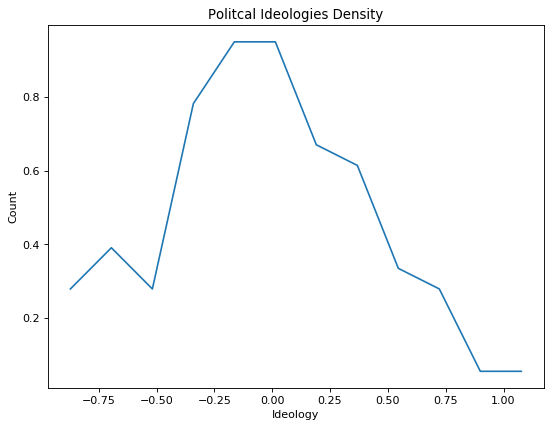

In [45]:
plt.figure(figsize=(8,6), dpi=80)
plt.subplot(111)
y,binEdges=np.histogram(phi, bins=12, density=True)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-')
plt.title("Politcal Ideologies Density")
plt.xlabel("Ideology")
plt.ylabel("Count")
plt.show()

In [46]:
#skip this cell
import utils
import tweepy
api = utils.get_tweepy_api(3)
followers = []
for i in range(elites_data.shape[0]):
    eid, name = elites_data.iloc[i][['id', 'screen_name']]
    user = utils.tweepy_api_call(api.get_user, id=eid)
    if not user:
        print(name)
        continue
    followers.append((user.followers_count, name))

NameError: name 'elites_data' is not defined

In [ ]:
#skip this cell
import json
print(json.dumps(sorted(followers, reverse=True), indent=2))

In [48]:
vip = [
    'mlp_officiel',
    'le_figaro',
    'libe',
    '20minutes',
    'jlmelenchon',
    'lesrepublicains',
    'partisocialiste',
    'dupontaignan',
    'jclagarde',
    'gilbertcollard',
    'slefoll'
]


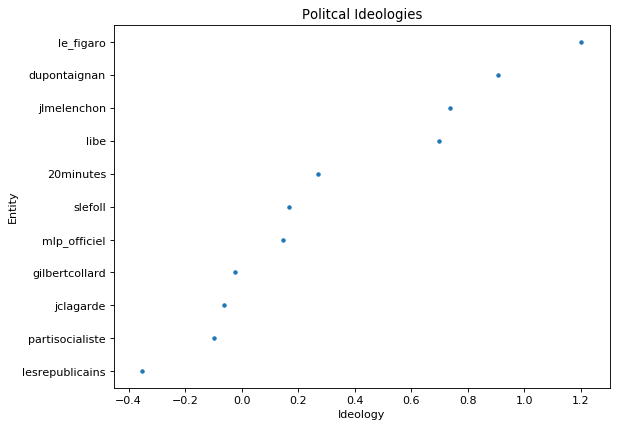

In [49]:
plt.figure(figsize=(8,6), dpi=80)
plt.subplot(111)

sort = phi_center[vip].sort_values()
y_labels = list(sort.index)
x = np.arange(len(vip))
plt.plot(sort.values, x, '.')
plt.title("Politcal Ideologies")
plt.xlabel("Ideology")
plt.ylabel("Entity")

plt.xlim(sort.values[0]-0.1, sort.values[-1]+0.1)

plt.yticks(np.arange(len(vip)), y_labels)

plt.show()